In [1]:
import os
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import glob
import datetime
import random
import matplotlib.pyplot as plt
import future

In [2]:
file_2013 = r'C:/Users/loren/sptrans_project/docs_sptrans_tcc/sptransAgendaXLS/sptrans_2013/consolidado_agendasptrans2013.csv' 
file_2014 = r'C:/Users/loren/sptrans_project/docs_sptrans_tcc/sptransAgendaXLS/sptrans_2014/consolidado_agendasptrans2014.csv' 

In [31]:
df = pd.read_csv(file_2014)

#df["PASSAGEIROS PAGANTES"] = df["PASSAGEIROS PAGANTES"].replace(to_replace=r',', value='.', regex=True)
#df["PASSAGEIROS PAGANTES EM DINHEIRO\n"] = df["PASSAGEIROS PAGANTES EM DINHEIRO\n"].replace(to_replace=r',', value='.', regex=True)
df["TOTAL PASSAGEIROS TRANSPORTADOS"] = df["TOTAL PASSAGEIROS TRANSPORTADOS"].replace(to_replace=r',', value='', regex=True)
df["PASSAGEIROS PAGANTES"] = df["PASSAGEIROS PAGANTES\n"].replace(to_replace=r',', value='', regex=True)

df.head()

,AREA,TIPO,DATA,EMPRESA,LINHA,PASSAGEIROS PAGANTES EM DINHEIRO\n,PASSAGEIROS PAGANTES BILHETE ÚNICO COMUM\n,PASSAGEIROS PAGANTES BILHETE ÚNICO COMUM MENSAL\n,PASSAGEIROS PAGANTES BILHETE ÚNICO ESTUDANTE\n,PASSAGEIROS PAGANTES BILHETE ÚNICO ESTUDANTE MENSAL\n,...,PASSAGEIROS PAGANTES BILHETE ÚNICO VALE TRANSPORTE MENSAL\n,PASSAGEIROS PAGANTES INTEGRAÇÕES METRÔ E CPTM\n,PASSAGEIROS PAGANTES INTEGRAÇÕES METRÔ E CPTM MENSAL\n,PASSAGEIROS PAGANTES\n,PASSAGEIROS INTEGRAÇÕES ÔNIBUS 0> ÔNIBUS\n,PASSAGEIROS COM GRATUIDADE\n,TOTAL PASSAGEIROS TRANSPORTADOS,nome,letreiro,PASSAGEIROS PAGANTES
0,AREA 1,CONCESSAO,2014-01-01,GATO PRETO,800010 - TERM LAPA/PCA RAMOS,15712,36971,194,2476,0,...,0.0,7153,2,91864,76378,18966,187208,NaN,NaN,91864
1,AREA 1,CONCESSAO,2014-01-01,GATO PRETO,830010 - TERM PIRITUBA/TERM LAPA,1689,4604,18,311,0,...,0.0,1666,0,12029,11772,2260,26061,NaN,NaN,12029
2,AREA 1,CONCESSAO,2014-01-01,GATO PRETO,853810 - VILA IARA/PAISSANDU,4049,10614,31,576,0,...,0.0,402,0,25287,9928,5178,40393,NaN,NaN,25287
3,AREA 1,CONCESSAO,2014-01-01,GATO PRETO,854210 - BRASILANDIA/PCA DO CORREIO,27329,64806,196,3542,0,...,0.0,4493,2,154174,63956,28867,246997,NaN,NaN,154174
4,AREA 1,CONCESSAO,2014-01-01,GATO PRETO,854510 - PENTEADO/METRO BARRA FUNDA,10382,28882,104,1772,0,...,0.0,7749,0,73228,36001,16426,125655,NaN,NaN,73228


In [38]:
df_new = df.set_index(['AREA', 'DATA'])

new = df_new[["PASSAGEIROS PAGANTES\n"]]
new = new.groupby(['DATA', 'AREA']).sum(["TOTAL PASSAGEIROS TRANSPORTADOS\n"])

new.head()

PASSAGEIROS PAGANTES\n
DATA       AREA                                                     
2014-01-01 AREA 1  9186412029252871541747322856870982307150571415...
           AREA 2  2122781445427960147378948724508642387234871109...
           AREA 3  1068863814944310889364115230931347820221607573...
           AREA 4  2692319953612544715628553817691367425092362771...
           AREA 5  4660264332163107170478155349865191615215779198...

In [39]:
import matplotlib.pyplot as plt
(new/new.iloc[0]*100).plot(figsize=(15,5))
plt.ylabel('crescimento populacional')
plt.xlabel('ano')
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

<AxesSubplot:xlabel='DATA'>

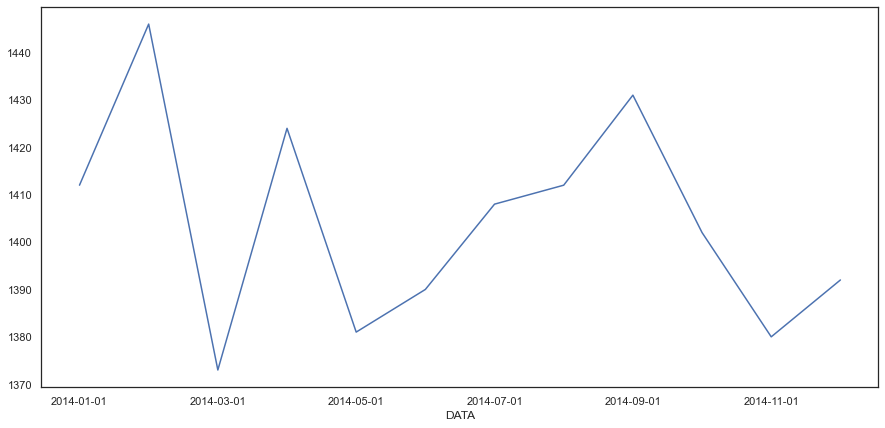

In [94]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['DATA']).count()['PASSAGEIROS PAGANTES'].plot(ax=ax)

KeyError: "None of [Float64Index([0.07937171064908044,  0.8236062263716012,   0.708830069699484,\n              0.34250665311566286,  0.9809141172700935, 0.48850457701996897,\n              0.08767068730729244,  0.5641494091567658,  0.3427753098769789,\n               0.8081257775381772],\n             dtype='float64')] are in the [columns]"

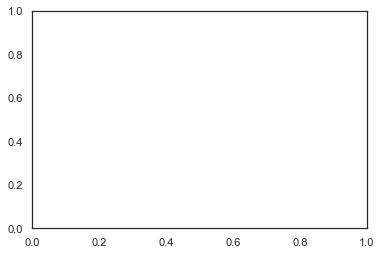

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("white")

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))
ax2 =ax.twinx()
ax2.plot(100*np.random.rand(10))
sns.despine(ax=ax, right=True, left=True)
sns.despine(ax=ax2, left=True, right=False)
ax2.spines['right'].set_color('white')

<AxesSubplot:xlabel='DATA'>

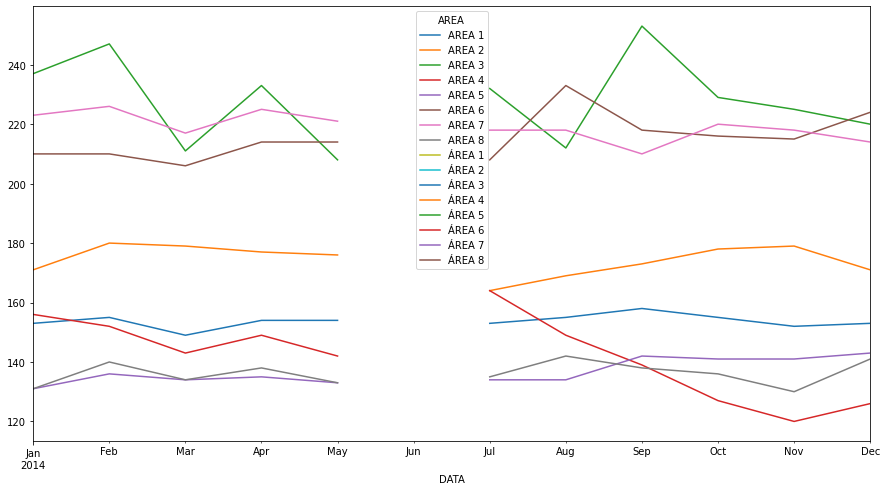

In [38]:
# plot data
fig, ax = plt.subplots(figsize=(15,8))
# use unstack()
df.groupby(['DATA','AREA']).count()['PASSAGEIROS PAGANTES'].unstack().plot(ax=ax)


In [21]:
tb = sns.barplot(data=df, x="DATA", y="PASSAGEIROS PAGANTES", hue="PASSAGEIROS PAGANTES", palette=['blue', 'red', 'yellow', 'grey'], saturation=0.6)

ValueError: Image size of 395x123983 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [ ]:
# Customise some display properties

tb.set_title('UK election results')
tb.grid(color='#cccccc')
tb.set_ylabel('Seats')
tb.set_xlabel(None)
tb.set_xticklabels(df["DATA"].unique().astype(str), rotation='vertical')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(df['DATA'],
       df['TOTAL PASSAGEIROS TRANSPORTADOS\n'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

plt.show()

In [ ]:
import seaborn as sns

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="DATA", y="TOTAL PASSAGEIROS TRANSPORTADOS\n", col="AREA", hue="AREA",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df,x="DATA", y="TOTAL PASSAGEIROS TRANSPORTADOS\n", col="AREA",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

In [77]:
df = df.groupby(['DATA','AREA']).sum(["TOTAL PASSAGEIROS TRANSPORTADOS\n"])

#data = df.sort_values(by = ['DATA'], ascending=[True])
#print(new_df)

df.head(50)

PASSAGEIROS PAGANTES BILHETE ÚNICO COMUM\n  \
DATA      AREA                                                 
1/1/2014  AREA 1                                   5591291.0   
          AREA 2                                   6096540.0   
          AREA 3                                   7269440.0   
          AREA 4                                   5960968.0   
          AREA 5                                   5219214.0   
          AREA 6                                   8301270.0   
          AREA 7                                   8256872.0   
          AREA 8                                   4135135.0   
10/1/2014 AREA 1                                   5825185.0   
          AREA 2                                   6443509.0   
          AREA 3                                   8347743.0   
          AREA 4                                   5314387.0   
          AREA 5                                   5765707.0   
          AREA 6                                   8494398.0   
          AREA 7                                   8647509.0   
          AREA 8                                   4566523.0   
11/1/2014 AREA 1                                   5150077.0   
          AREA 2                                   5642807.0   
          AREA 3                                   7489427.0   
          AREA 4                                   4735946.0   
          AREA 5                                   5128309.0   
          AREA 6                                   7545533.0   
          AREA 7                                   7667364.0   
          AREA 8                                   3971396.0   
12/1/2014 AREA 1                                   5243197.0   
          AREA 2                                   5663838.0   
          AREA 3                                   7706277.0   
          AREA 4                                   4771146.0   
          AREA 5                                   5125659.0   
          AREA 6                                   7704223.0   
          AREA 7                                   7643105.0   
          AREA 8                                   3891442.0   
2/1/2014  AREA 1                                   5842004.0   
          AREA 2                                   6433930.0   
          AREA 3                                   7569758.0   
          AREA 4                                   6196904.0   
          AREA 5                                   5476458.0   
          AREA 6                                   8554014.0   
          AREA 7                                   8477171.0   
          AREA 8                                   4438851.0   
3/1/2014  AREA 1                                   2318339.0   
          AREA 2                                   2813862.0   
          AREA 3                                   2788153.0   
          AREA 4                                   2085878.0   
          AREA 5                                   2198093.0   
          AREA 6                                   2769365.0   
          AREA 7                                   2265612.0   
          AREA 8                                   2121984.0   
4/1/2014  AREA 1                                   5313771.0   
          AREA 2                                   5997335.0   

                  PASSAGEIROS PAGANTES BILHETE ÚNICO COMUM MENSAL\n  \
DATA      AREA                                                        
1/1/2014  AREA 1                                            15619.0   
          AREA 2                                            18231.0   
          AREA 3                                            17234.0   
          AREA 4                                            14586.0   
          AREA 5                                            15327.0   
          AREA 6                                            21606.0   
          AREA 7                                            23634.0   
          AREA 8                                  

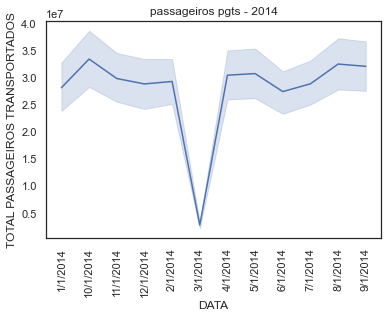

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x="DATA", y="TOTAL PASSAGEIROS TRANSPORTADOS", data=df)
plt.xticks(rotation=90)
plt.title('passageiros pgts - 2014')
plt.show()

<AxesSubplot:xlabel='DATA'>

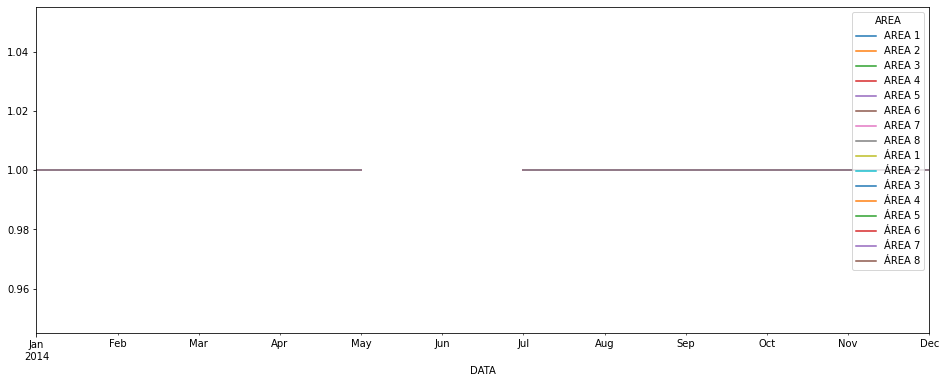

In [19]:
fig, ax = plt.subplots(figsize=(16,6))

df.groupby(['DATA','AREA']).count()['TOTAL PASSAGEIROS TRANSPORTADOS'].unstack().plot(ax=ax)

KeyError: 'DATA'

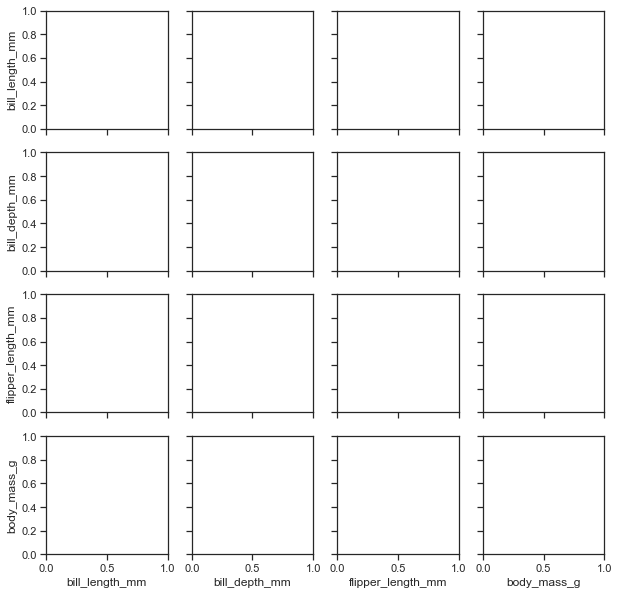

In [44]:
import seaborn as sns
sns.set_theme(style="ticks")

data = df
sns.pairplot(data, hue="DATA")